In [ ]:
#Es un proyecto de Machine Learning from disaster


Nuestro Dataset está compuesto por una serie de columnas, que tienen los siguientes significados:

Sobreviviente: 0 = No; 1 = Si

Clase: 1 = Primera Clase; 2 = Segunda Clase; 3 = Tercera Clase

Género: 0 = Hombre; 1 = Mujer

Edad: edad en años

HermEsp: cantidad de hermanos o esposos a bordo del Titanic, para el pasajero en cuestión

PadHij: cantidad de padres o hijos a bordo del Titanic, para el pasajero en cuestión

In [21]:
#Importamos bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Bibliotecas especificas para el machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

In [5]:
#Vinculamos el drive para acceder a nuestro dataset
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
#Leemos nuestro dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet_Titanic.csv")

In [8]:
#Separamos los contenidos en mi dataset segun si es la etiqueta a predecir o no

#Guardamos los datos que no son lo que nos importa predecir en una variable
X = df.drop("Sobreviviente", axis = 1) #Separamos de nuestro dataset el dato que queremos predecir, y al poner axis = 1 hacemos referencia a que es una columna

#Guardamos la columna a predecir
Y = df.Sobreviviente

In [9]:
#Visualizamos X
X

Clase  Genero  Edad  HermEsp  PadHij
0        3       0  22.0        1       0
1        1       1  38.0        1       0
2        3       1  26.0        0       0
3        1       1  35.0        1       0
4        3       0  35.0        0       0
..     ...     ...   ...      ...     ...
709      3       1  39.0        0       5
710      2       0  27.0        0       0
711      1       1  19.0        0       0
712      1       0  26.0        0       0
713      3       0  32.0        0       0

[714 rows x 5 columns]

In [10]:
#visualizamos Y
Y

0      0
1      1
2      1
3      1
4      0
      ..
709    0
710    0
711    1
712    1
713    0
Name: Sobreviviente, Length: 714, dtype: int64

In [11]:
#Creamos nuestro arbol de decision
arbol = DecisionTreeClassifier(max_depth = 2, random_state = 42) #Max depht define la profundide maxima de nustro arbol mientras que random state
                                                                 # habla del porcentaje de aleatoriedad del arbol

In [12]:
#Entrenamos al arbol sobre los datos
arbol.fit(X,Y) #El metodo fit se encarga de entrenar a nuestro arbol en base al conjunto de datos que le pasemos como parametro

DecisionTreeClassifier(max_depth=2, random_state=42)

In [13]:
#Con el arbol ya entrenado podemos empezar a predecir resultados:
prediccion_Y = arbol.predict(X) #Este metodo devuelve una prediccion en base a los datos pasados por parametro

#Podemos ver que tan precisa fue nuestra prediccion a travez del metodo accuracy_score:
print("Precision:", accuracy_score(prediccion_Y,Y))

Precision: 0.8025210084033614


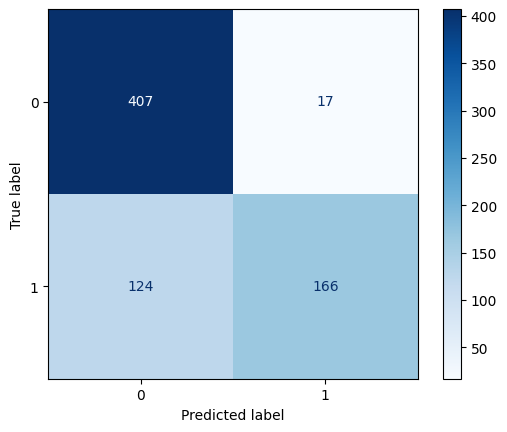

In [17]:
#Creamos una matriz de confusion para poder ver mejor los datos
confusion_matrix(Y, prediccion_Y) #Genera un aray con los datos para la creacion de la matriz

#Creamos un grafico para mejor comprension de la matriz
ConfusionMatrixDisplay.from_estimator(arbol, X, Y, cmap = plt.cm.Blues, values_format = '.0f')

Viendo la matriz vemos la cantidad de concidencias contra los datos verdades en los cuatro casos posibles, esto nos permite entender mejor el rango de error que tiene nuestro arbol

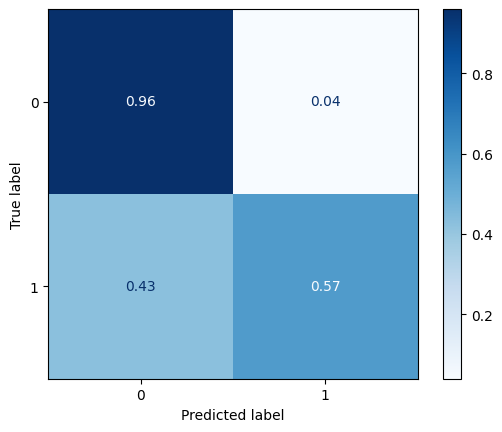

In [18]:
#Si queremos ver el porcentaje de aciertos podemos mostrar la matriz de la siguiente forma
ConfusionMatrixDisplay.from_estimator(arbol, X, Y, cmap = plt.cm.Blues, values_format = '.2f', normalize = 'true')

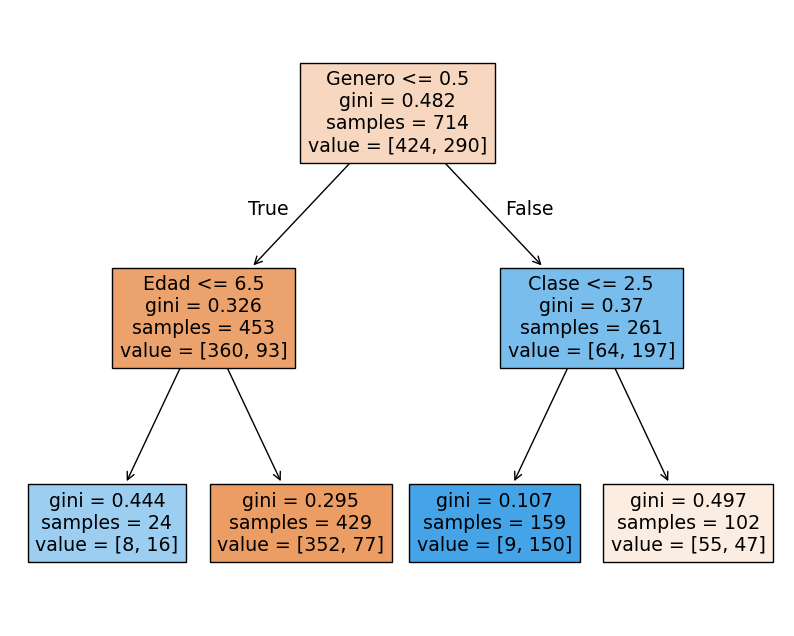

In [23]:
#Podemos mostrar el arbol de decision creado para el entrenamiento del modelo con el siguiente metodo:
plt.figure(figsize = (10,8))
tree.plot_tree(arbol, filled = True, feature_names = X.columns)
plt.show()

In [24]:
#Podemos graficar con un grafico de barras la importancia de las caracteristicas para las chances de sobrevivir:
importancia = arbol.feature_importances_
columnas = X.columns

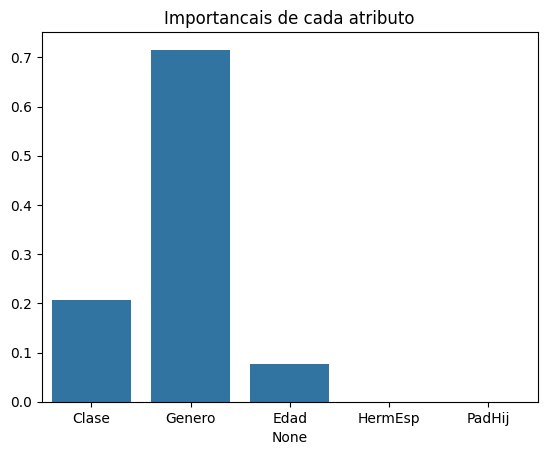

In [26]:
#Creamos el grafico
sns.barplot(x = columnas, y = importancia)
plt.title("Importancais de cada atributo")
plt.show()